In [2]:
library(igraph)
#library("poweRlaw")
library("ggplot2")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [6]:
#2a
fat_tail_network <- barabasi.game(1000, directed = FALSE)
deg_ft <- degree(fat_tail_network)
#diameter(fat_tail_network)
is_connected(fat_tail_network)

[1] TRUE

In [7]:
#2b
cluster <- clusters(fat_tail_network)
giant_component <- induced_subgraph(fat_tail_network, which(cluster$membership == which.max(cluster$csize)))
community_structure <- fastgreedy.community(giant_component)
modularity <- modularity(community_structure)
modularity

[1] 0.9342756

In [8]:
#2c
large_fat_tail_network <- barabasi.game(10000, directed = FALSE)
deg_large_ft <- degree(large_fat_tail_network)
large_cluster <- clusters(large_fat_tail_network)
large_giant_component <- induced_subgraph(large_fat_tail_network, which(large_cluster$membership == which.max(large_cluster$csize)))
large_community_structure <- fastgreedy.community(large_giant_component)
large_modularity <- modularity(large_community_structure)
large_modularity

[1] 0.9786589


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
      -0.1197        -2.2436  


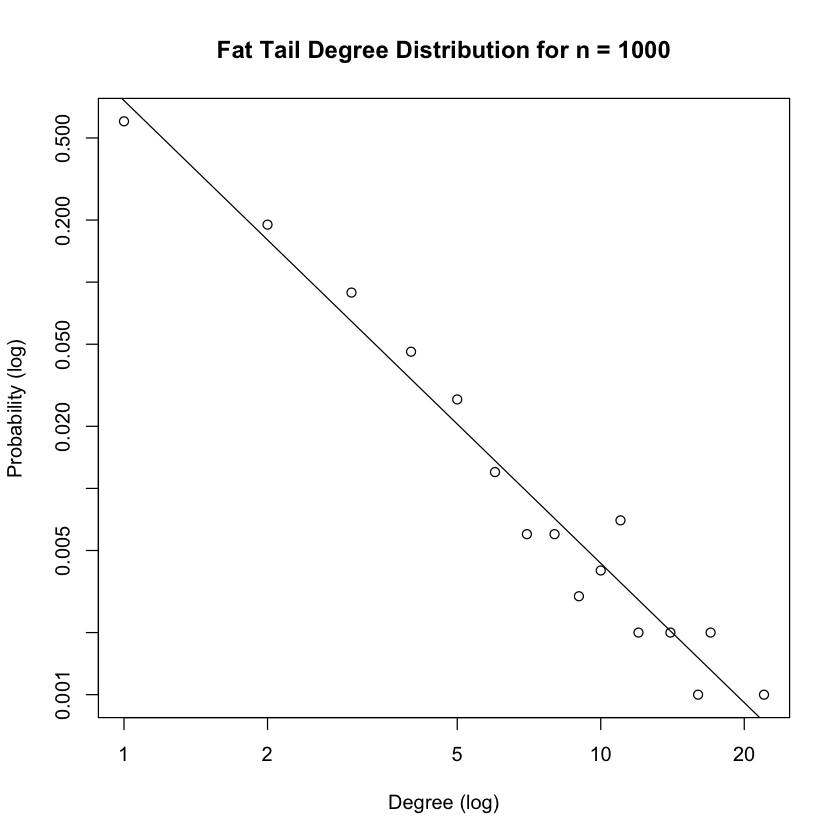

In [10]:
#2d
plot_degree_distribution = function(graph) {
  # calculate degree
  d = degree(graph, mode = "all")
  dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
  degree = 1:max(d)
  probability = dd[-1]
  # delete blank values
  nonzero.position = which(probability != 0)
  probability = probability[nonzero.position]
  degree = degree[nonzero.position]
  # plot
  plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
       col = 1,main="Fat Tail Degree Distribution for n = 1000")
  abline(lm(log10(probability) ~ log10(degree)))
    lm(log10(probability) ~ log10(degree))
}

plot_degree_distribution(fat_tail_network)


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
    -0.003253      -2.595343  


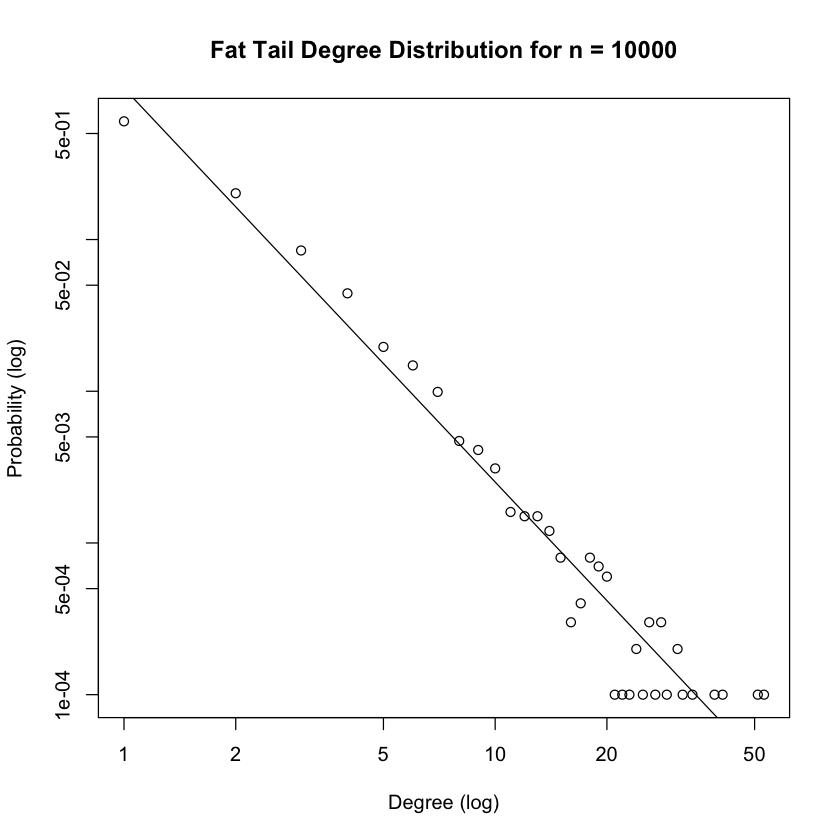

In [11]:
plot_degree_distribution = function(graph) {
  # calculate degree
  d = degree(graph, mode = "all")
  dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
  degree = 1:max(d)
  probability = dd[-1]
  # delete blank values
  nonzero.position = which(probability != 0)
  probability = probability[nonzero.position]
  degree = degree[nonzero.position]
  # plot
  plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
       col = 1,main="Fat Tail Degree Distribution for n = 10000")
  abline(lm(log10(probability) ~ log10(degree)))
    lm(log10(probability) ~ log10(degree))
}

plot_degree_distribution(large_fat_tail_network)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

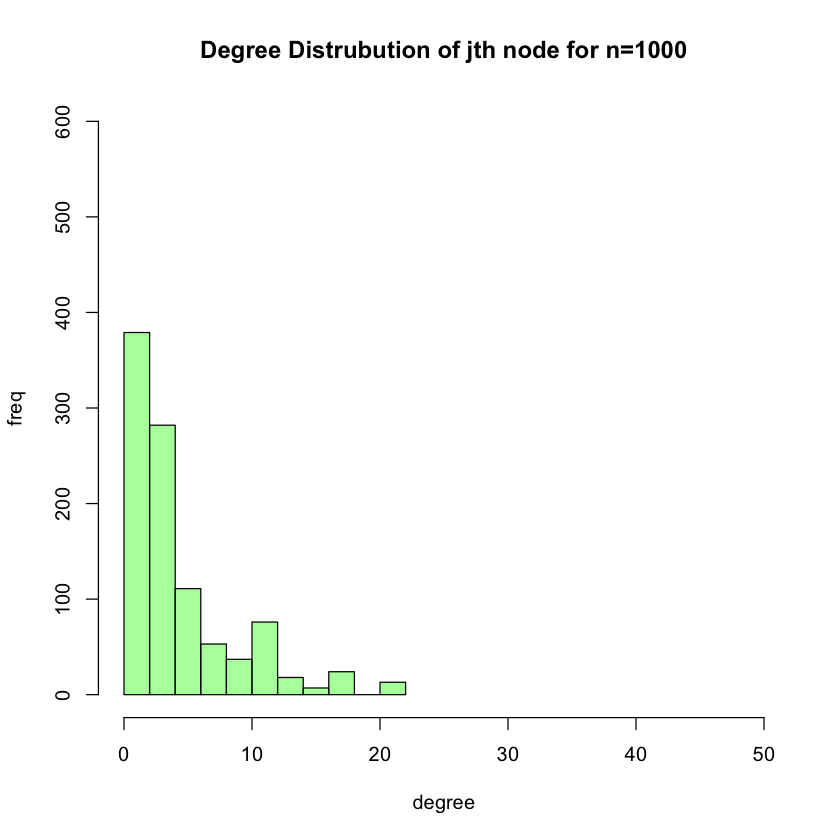

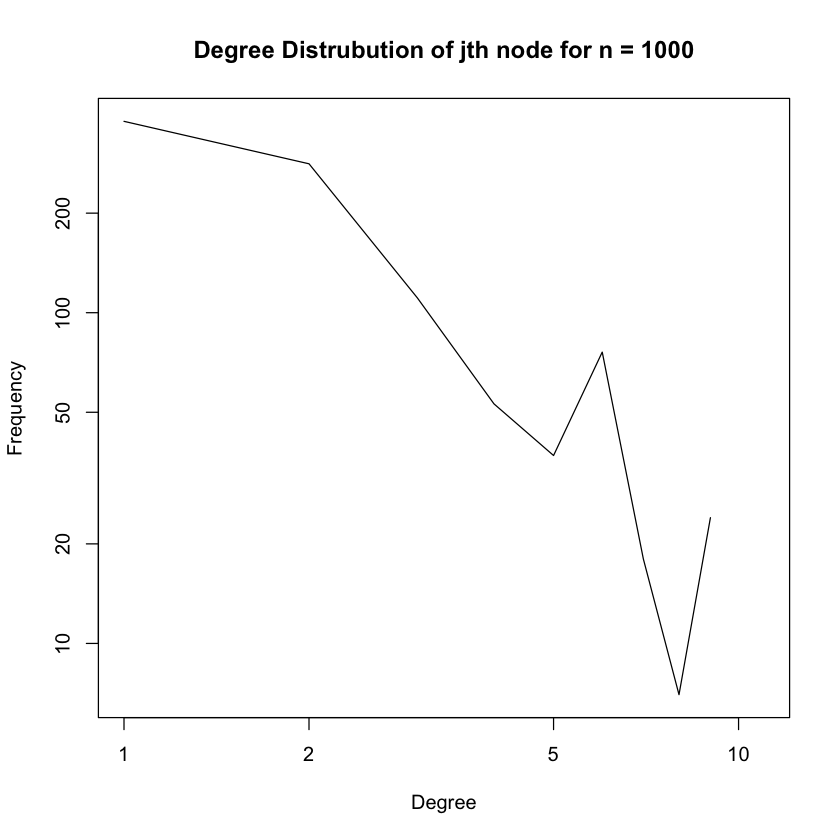

In [25]:
#2e 
#repeat the process for 1000 times and collect degree
deg_nj <- numeric()

for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(fat_tail_network, n_j))
    
}
h = hist(deg_nj, col=rgb(0,1,0,.4), xlim=c(0,50), ylim=c(0,600), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n=1000")
plot(h$counts,main="Degree Distrubution of jth node for n = 1000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")



Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

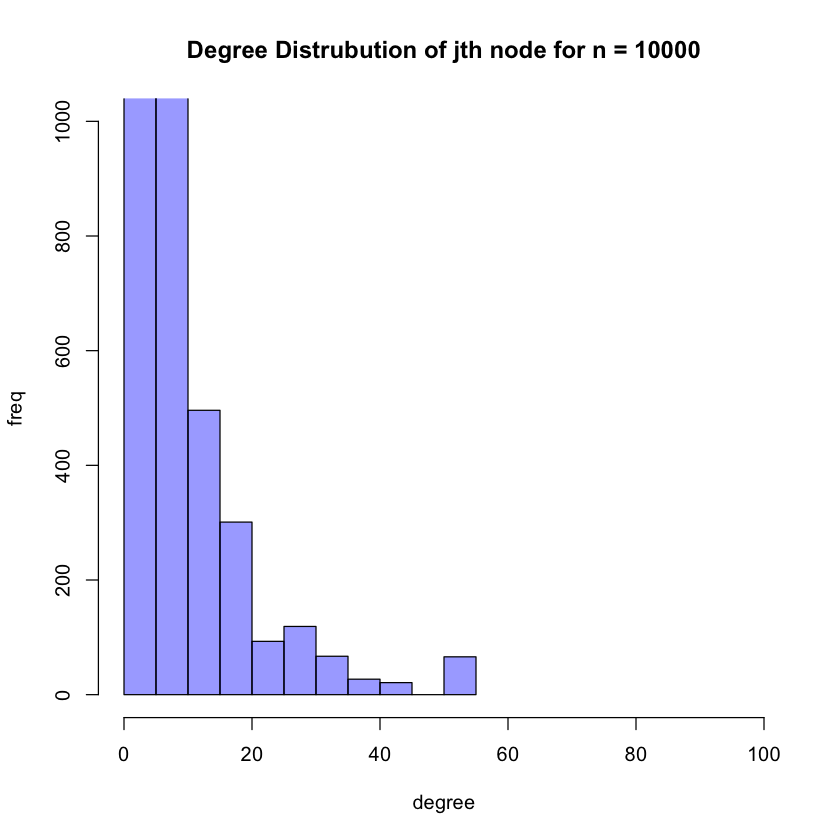

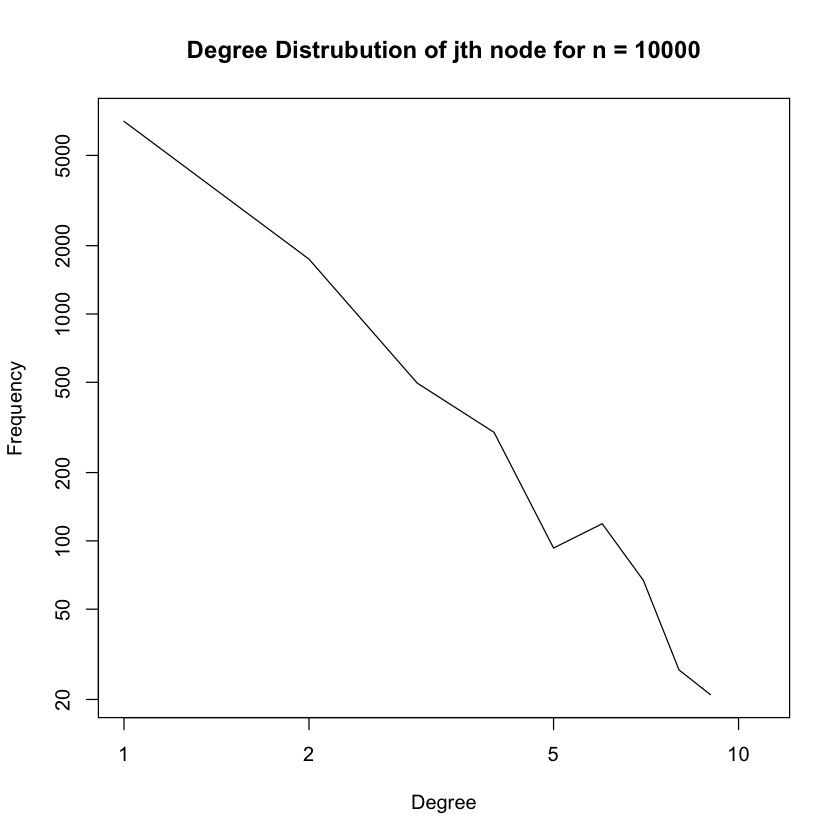

In [26]:
large_deg_nj <- numeric()
for (i in 1:10000) {
    #random generate a number within 1000
    n_i <- sample(10000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(large_fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    large_deg_nj <- c(large_deg_nj, degree(large_fat_tail_network, n_j))
    
}
h = hist(large_deg_nj, col=rgb(0,0,1,.4), xlim=c(0,100), ylim=c(0,1000), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n = 10000")
plot(h$counts,main="Degree Distrubution of jth node for n = 10000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")

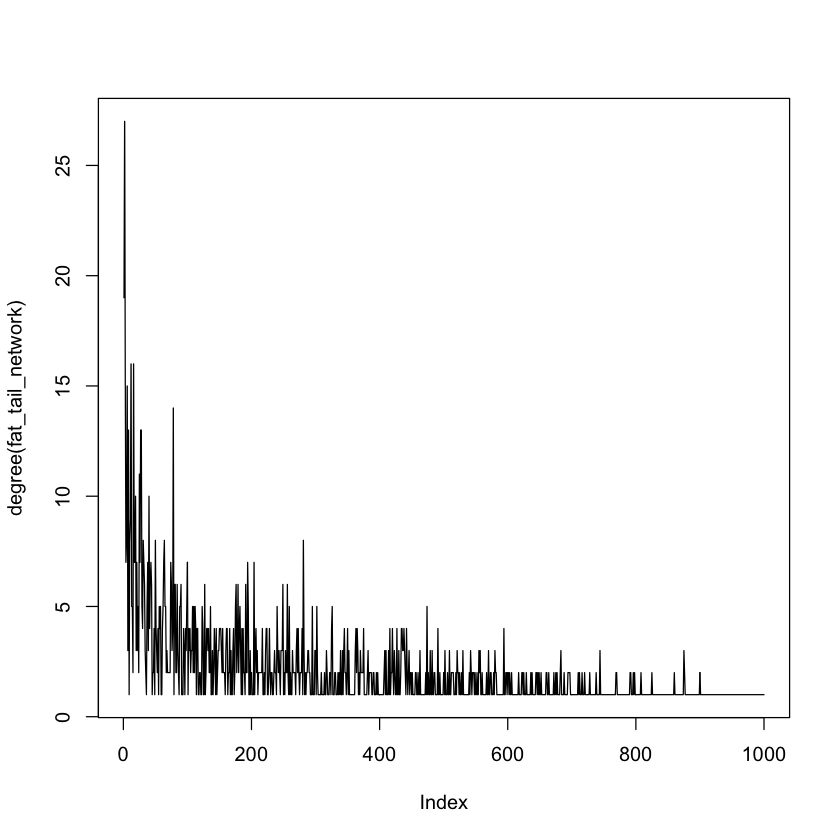

In [9]:
#2f
#g <- sample_pa(1000,1, directed = FALSE)
plot(degree(fat_tail_network), type = "l")

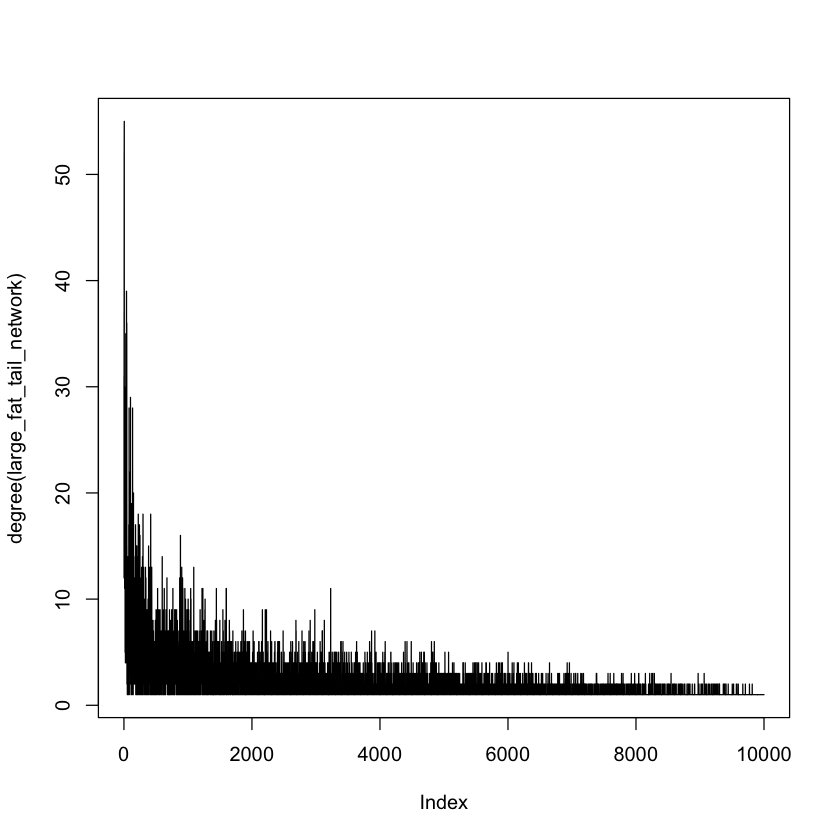

In [10]:
plot(degree(large_fat_tail_network), type = "l")

In [27]:
#2g

#m=2
m2_fat_tail_network <- barabasi.game(1000,m = 2,directed = FALSE)
m2_deg_ft <- degree(m2_fat_tail_network)
#diameter(fat_tail_network)
is_connected(m2_fat_tail_network)


[1] TRUE

In [28]:
#2b
m2_cluster <- clusters(m2_fat_tail_network)
m2_giant_component <- induced_subgraph(m2_fat_tail_network, which(m2_cluster$membership == which.max(m2_cluster$csize)))
m2_community_structure <- fastgreedy.community(m2_giant_component)
m2_modularity <- modularity(m2_community_structure)
m2_modularity


[1] 0.5234383

In [30]:
#2c
m2_large_fat_tail_network <- barabasi.game(10000,m=2, directed = FALSE)
m2_deg_large_ft <- degree(m2_large_fat_tail_network)


In [31]:
m2_large_cluster <- clusters(m2_large_fat_tail_network)
m2_large_giant_component <- induced_subgraph(m2_large_fat_tail_network, which(m2_large_cluster$membership == which.max(m2_large_cluster$csize)))
m2_large_community_structure <- fastgreedy.community(m2_large_giant_component)
m2_large_modularity <- modularity(m2_large_community_structure)
m2_large_modularity

[1] 0.5281332


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
       0.1267        -2.0938  


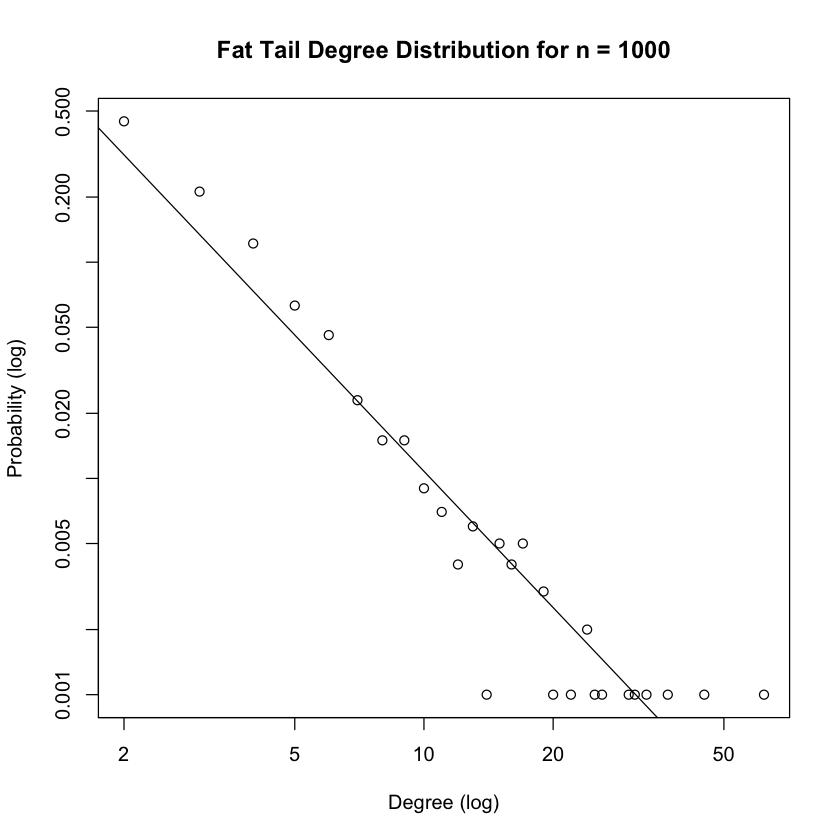


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
       0.2454        -2.3813  


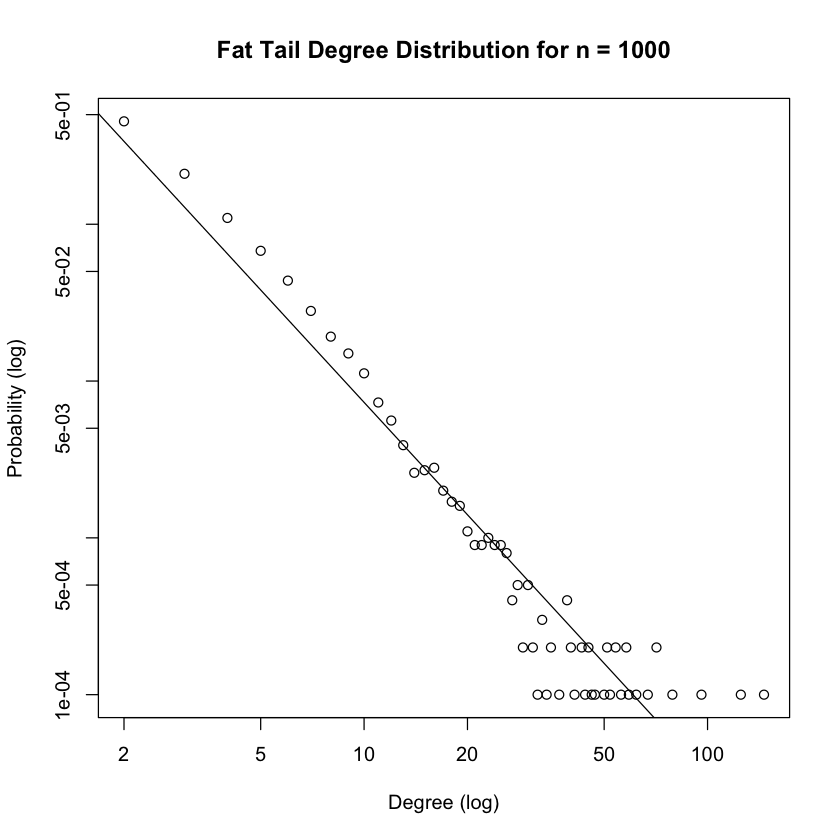

In [48]:
#2d
plot_degree_distribution = function(graph) {
  # calculate degree
  d = degree(graph, mode = "all")
  dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
  degree = 1:max(d)
  probability = dd[-1]
  # delete blank values
  nonzero.position = which(probability != 0)
  probability = probability[nonzero.position]
  degree = degree[nonzero.position]
  # plot
  plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
       col = 1,main="Fat Tail Degree Distribution for n = 1000")
  abline(lm(log10(probability) ~ log10(degree)))
    lm(log10(probability) ~ log10(degree))
}

plot_degree_distribution(m2_fat_tail_network)

plot_degree_distribution(m2_large_fat_tail_network)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“3 y values <= 0 omitted from logarithmic plot”

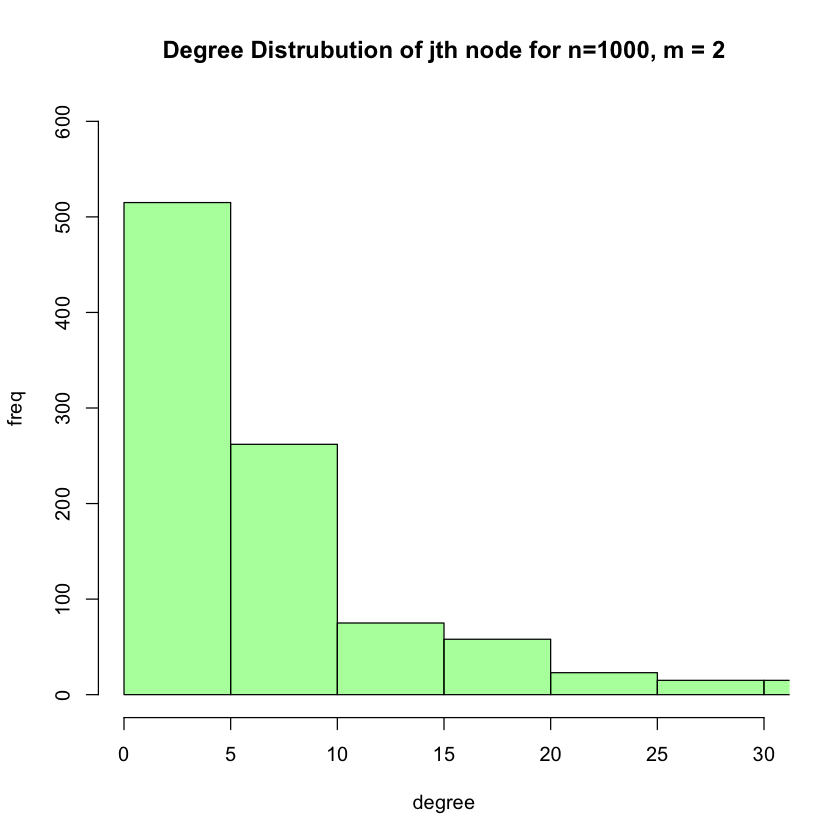

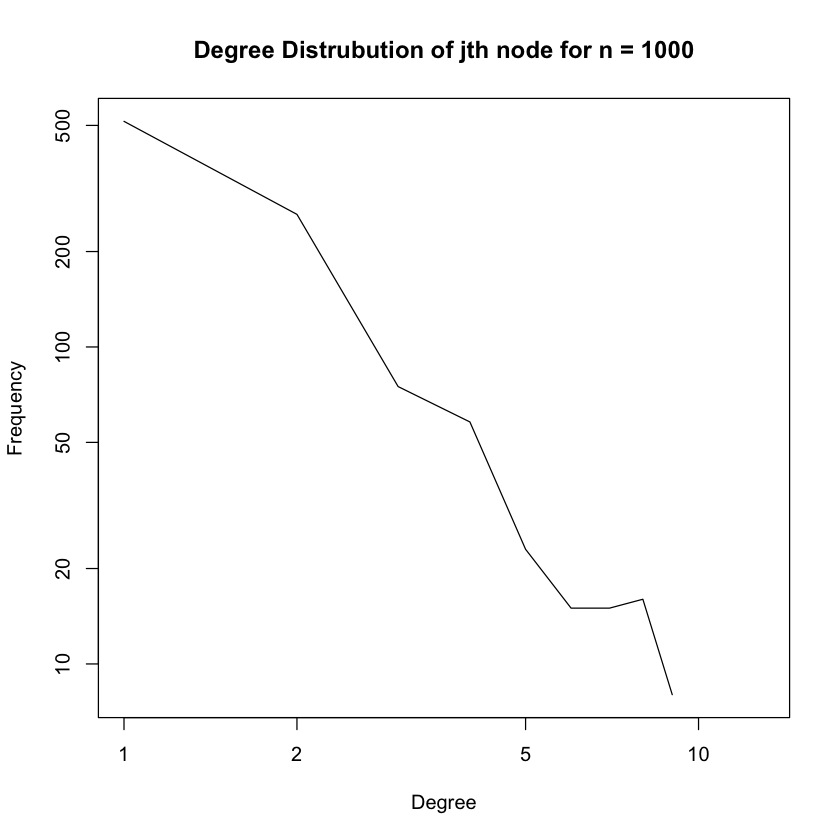

In [49]:

#2e 
#repeat the process for 1000 times and collect degree
deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(m2_fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(m2_fat_tail_network, n_j))
    
}
h = hist(deg_nj, col=rgb(0,1,0,.4), xlim=c(0,30), ylim=c(0,600), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n=1000, m = 2")
plot(h$counts,main="Degree Distrubution of jth node for n = 1000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")






Warning message in xy.coords(x, y, xlabel, ylabel, log):
“4 y values <= 0 omitted from logarithmic plot”

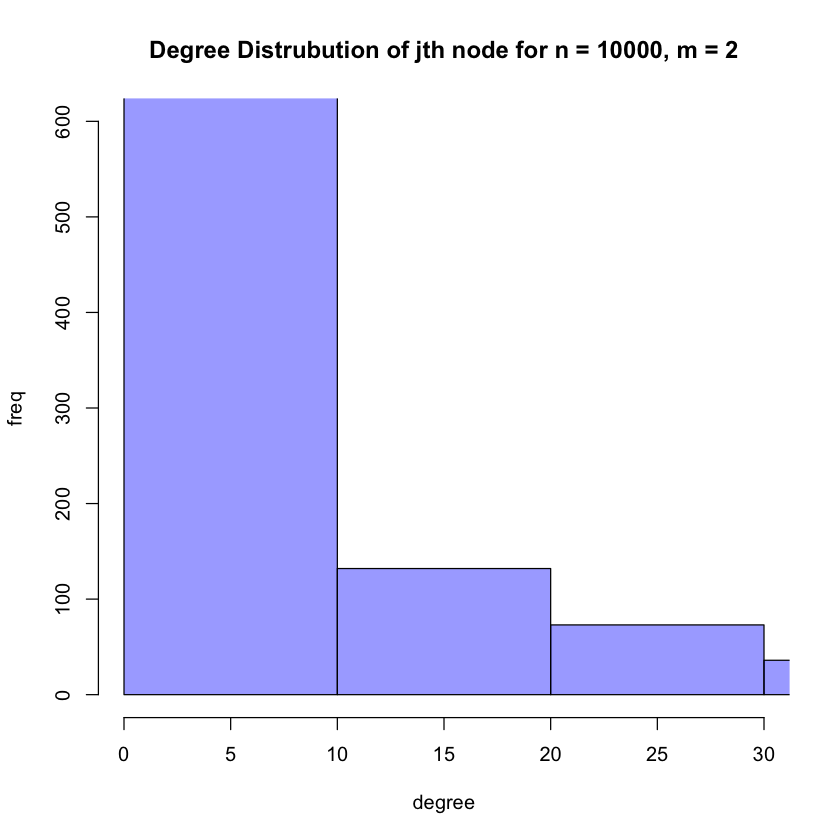

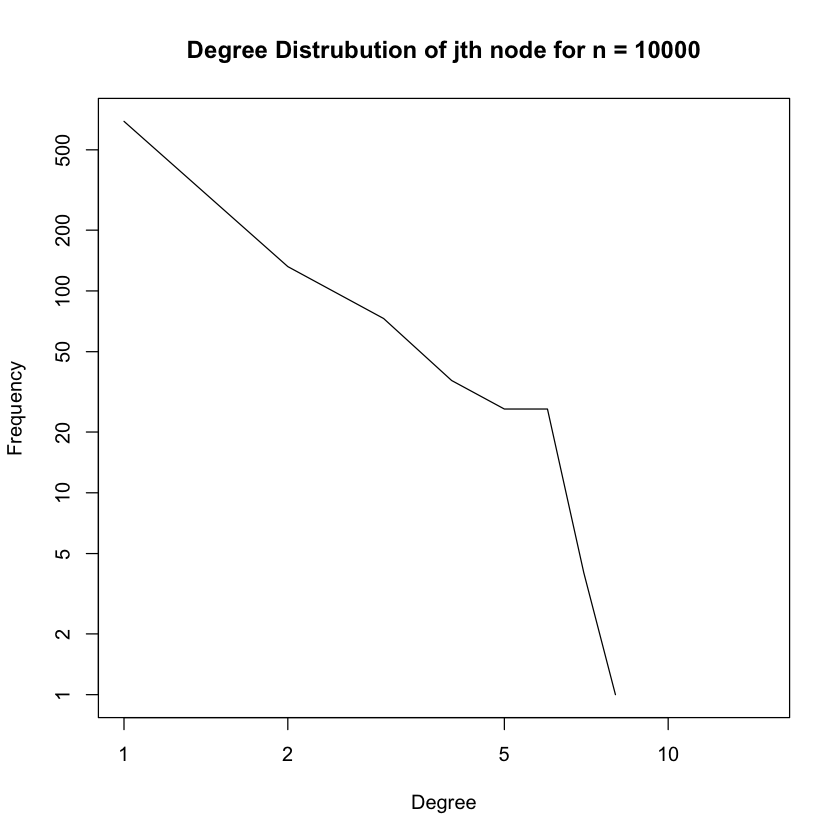

In [51]:
large_deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(m2_large_fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    large_deg_nj <- c(large_deg_nj, degree(m2_large_fat_tail_network, n_j))
    
}
h = hist(large_deg_nj, col=rgb(0,0,1,.4), xlim=c(0,30), ylim=c(0,600), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n = 10000, m = 2")
plot(h$counts,main="Degree Distrubution of jth node for n = 10000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")



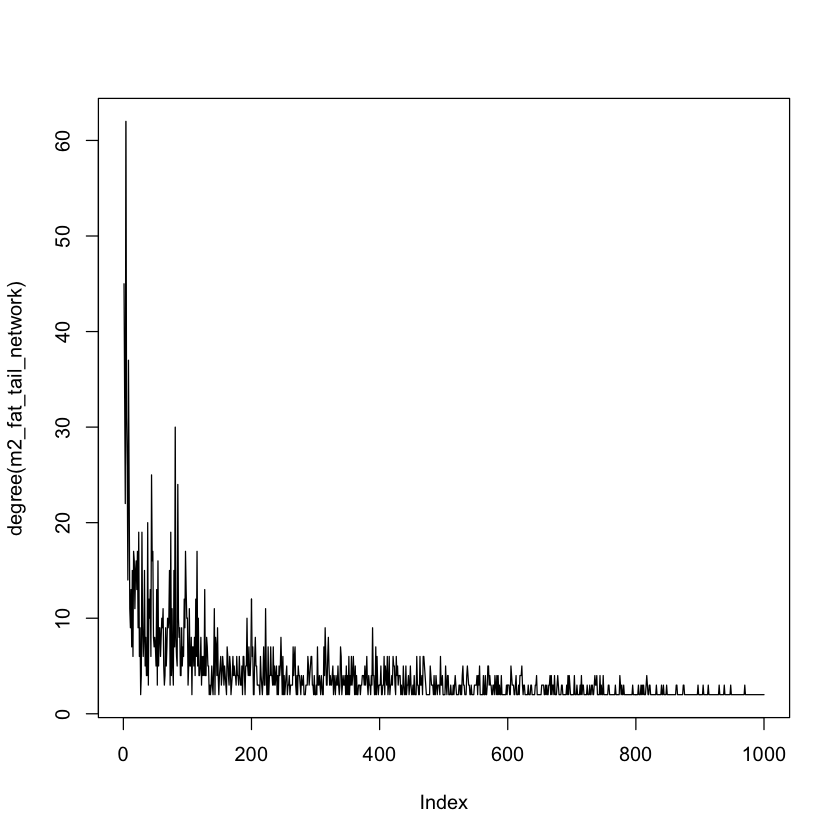

In [35]:
#2f
plot(degree(m2_fat_tail_network), type = "l")

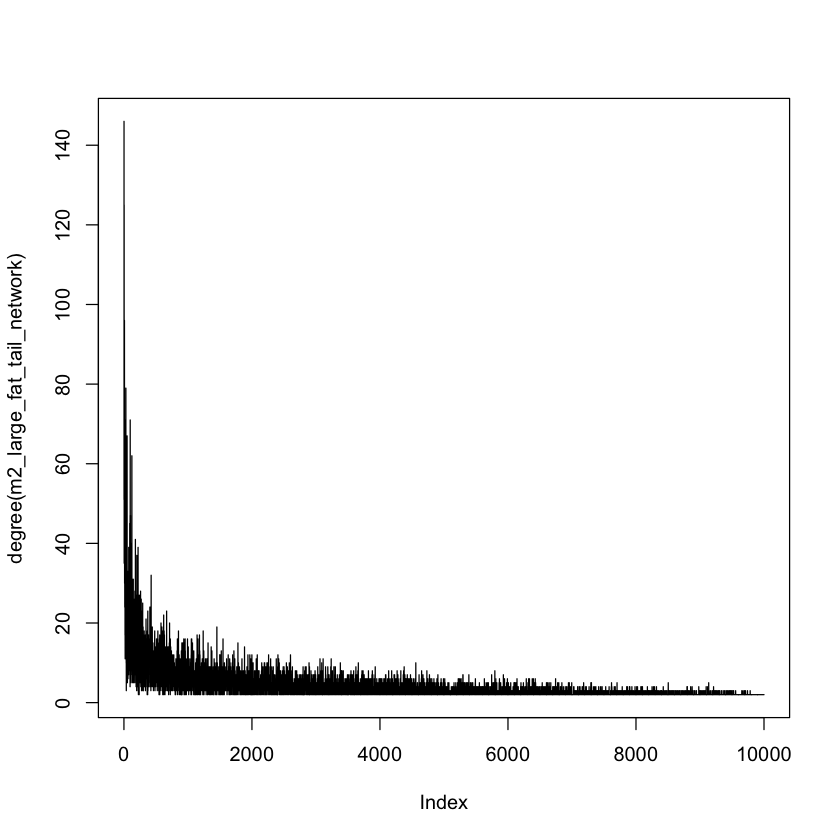

In [36]:

plot(degree(m2_large_fat_tail_network), type = "l")

In [43]:
#2g

#m=5
m5_fat_tail_network <- barabasi.game(1000,m = 5,directed = FALSE)
m5_deg_ft <- degree(m5_fat_tail_network)
#diameter(fat_tail_network)
is_connected(m5_fat_tail_network)






[1] TRUE

In [44]:
#2b
m5_cluster <- clusters(m5_fat_tail_network)
m5_giant_component <- induced_subgraph(m5_fat_tail_network, which(m5_cluster$membership == which.max(m5_cluster$csize)))
m5_community_structure <- fastgreedy.community(m5_giant_component)
m5_modularity <- modularity(m5_community_structure)
m5_modularity

[1] 0.280046

In [45]:
#2c
m5_large_fat_tail_network <- barabasi.game(10000,m = 5, directed = FALSE)
m5_deg_large_ft <- degree(m5_large_fat_tail_network)
m5_large_cluster <- clusters(m5_large_fat_tail_network)
m5_large_giant_component <- induced_subgraph(m5_large_fat_tail_network, which(m5_large_cluster$membership == which.max(m5_large_cluster$csize)))
m5_large_community_structure <- fastgreedy.community(m5_large_giant_component)
m5_large_modularity <- modularity(m5_large_community_structure)
m5_large_modularity

[1] 0.2719899


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
       0.4607        -1.9591  


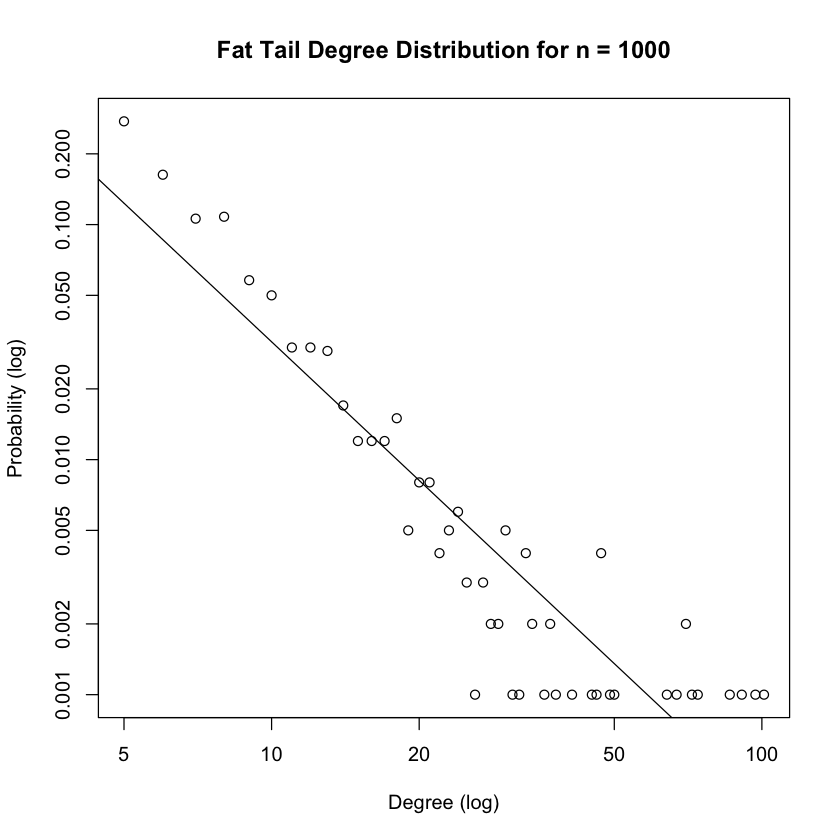


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
       0.5897        -2.2074  


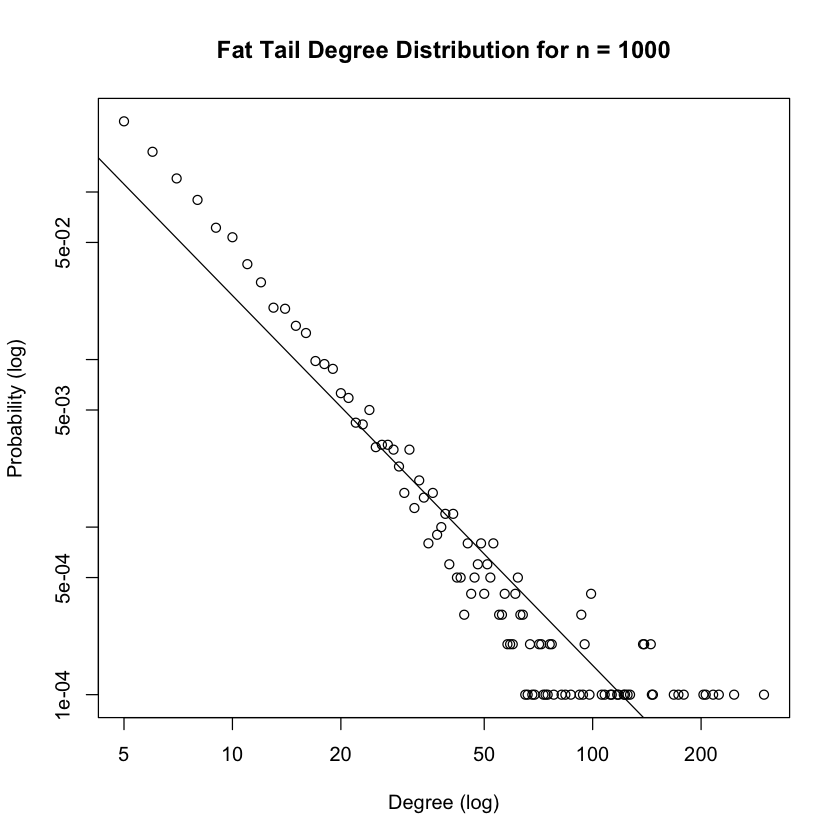

In [52]:
#2d
plot_degree_distribution = function(graph) {
  # calculate degree
  d = degree(graph, mode = "all")
  dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
  degree = 1:max(d)
  probability = dd[-1]
  # delete blank values
  nonzero.position = which(probability != 0)
  probability = probability[nonzero.position]
  degree = degree[nonzero.position]
  # plot
  plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
       col = 1,main="Fat Tail Degree Distribution for n = 1000")
  abline(lm(log10(probability) ~ log10(degree)))
    lm(log10(probability) ~ log10(degree))
}

plot_degree_distribution(m5_fat_tail_network)

plot_degree_distribution(m5_large_fat_tail_network)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

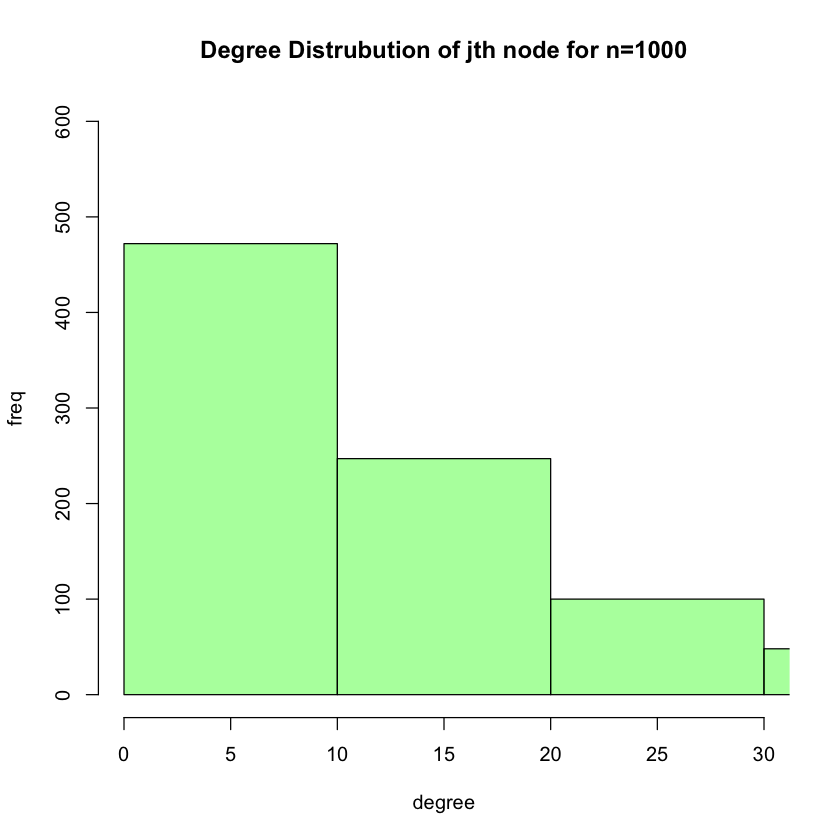

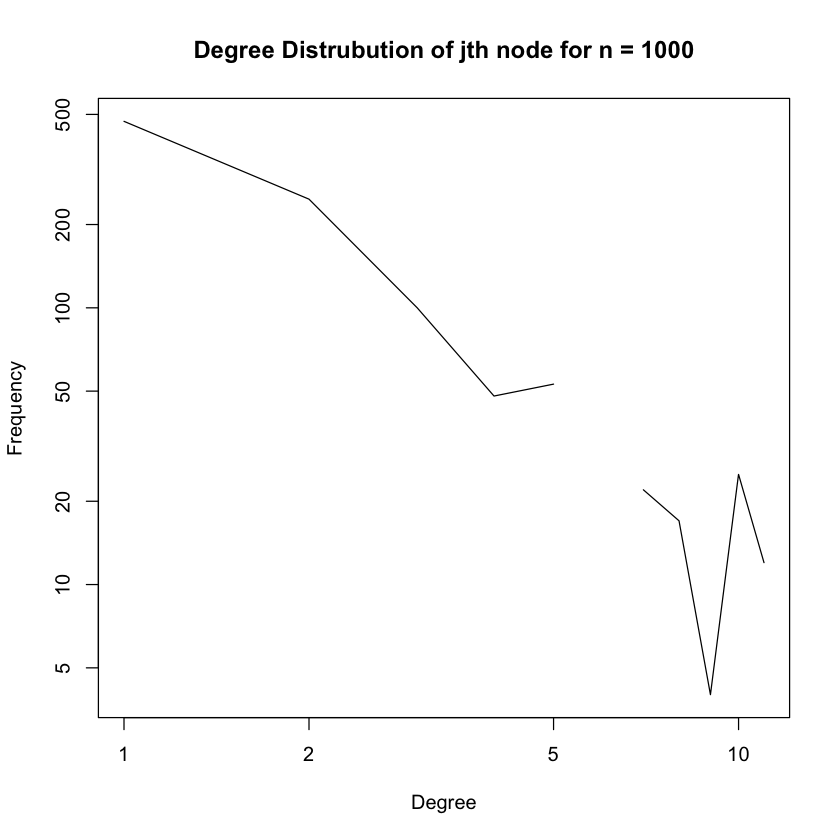

In [53]:
#2e 
#repeat the process for 1000 times and collect degree
deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(m5_fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(m5_fat_tail_network, n_j))
    
}
h = hist(deg_nj, col=rgb(0,1,0,.4), xlim=c(0,30), ylim=c(0,600), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n=1000")
plot(h$counts,main="Degree Distrubution of jth node for n = 1000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")






Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 y values <= 0 omitted from logarithmic plot”

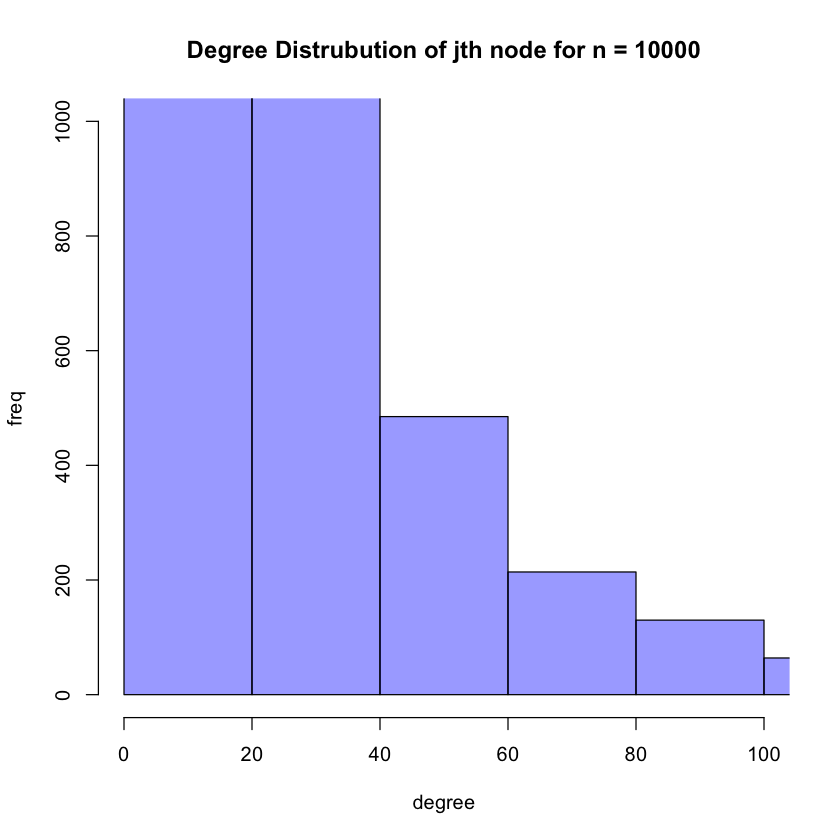

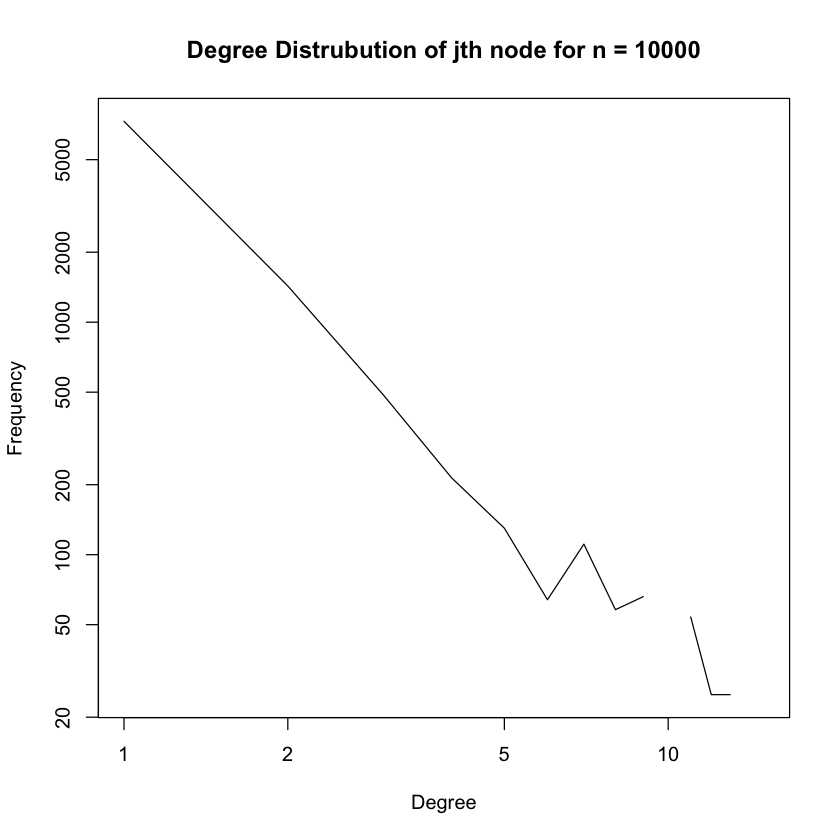

In [55]:

large_deg_nj <- numeric()
for (i in 1:10000) {
    #random generate a number within 1000
    n_i <- sample(10000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(m5_large_fat_tail_network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    large_deg_nj <- c(large_deg_nj, degree(m5_large_fat_tail_network, n_j))
    
}
h = hist(large_deg_nj, col=rgb(0,0,1,.4), xlim=c(0,100), ylim=c(0,1000), xlab="degree", ylab="freq", main="Degree Distrubution of jth node for n = 10000")
plot(h$counts,main="Degree Distrubution of jth node for n = 10000",type = 'l',xlab="Degree",ylab="Frequency", log = "xy")


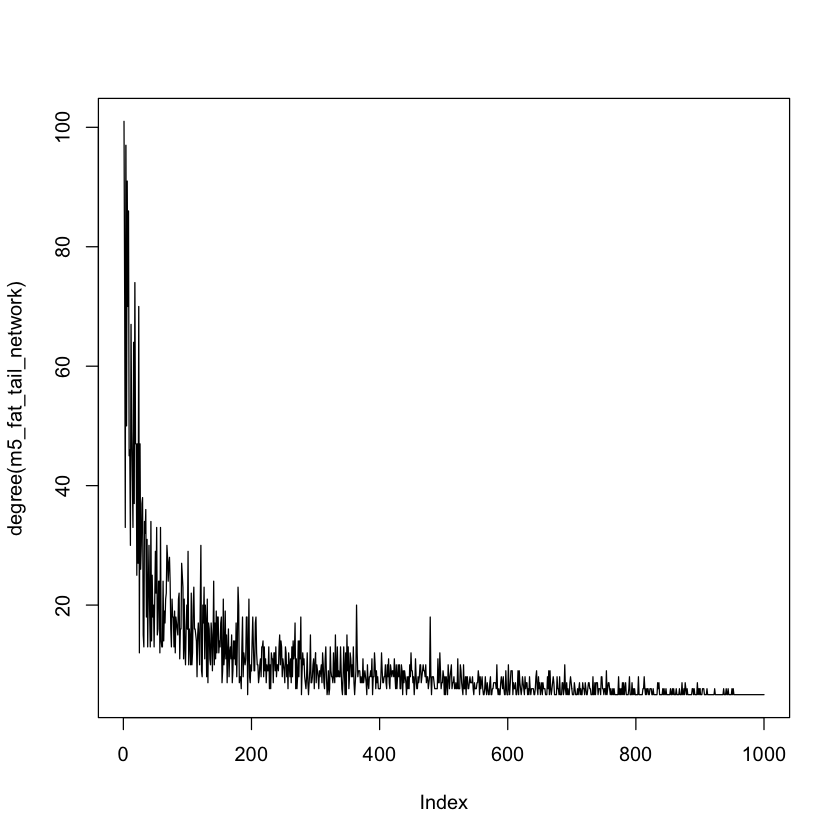

In [56]:
#2f

plot(degree(m5_fat_tail_network), type = "l")

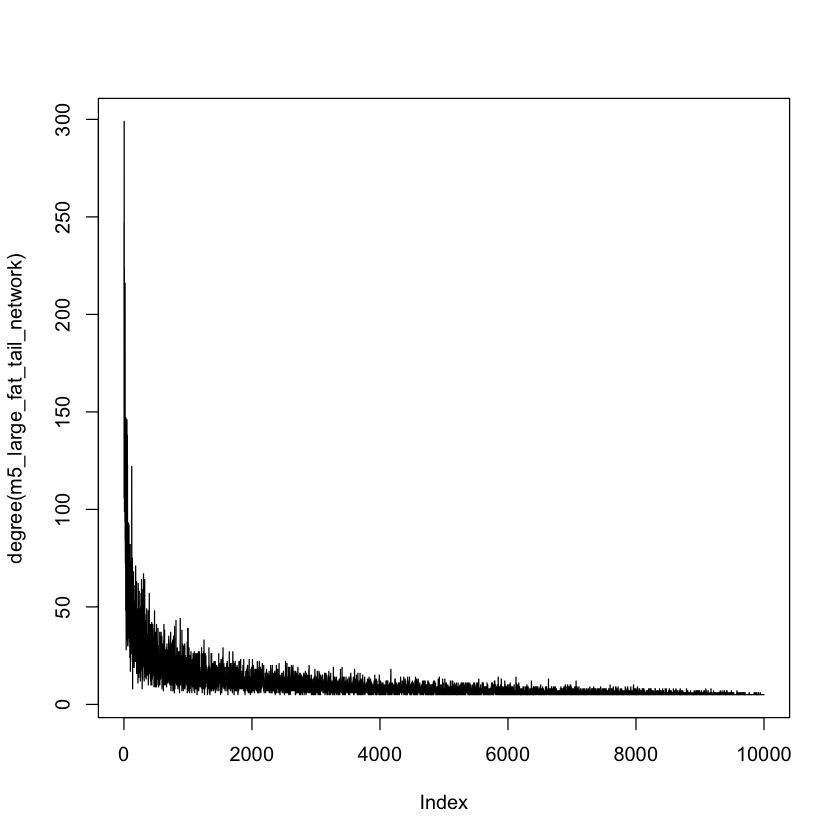

In [57]:
#2f
plot(degree(m5_large_fat_tail_network), type = "l")

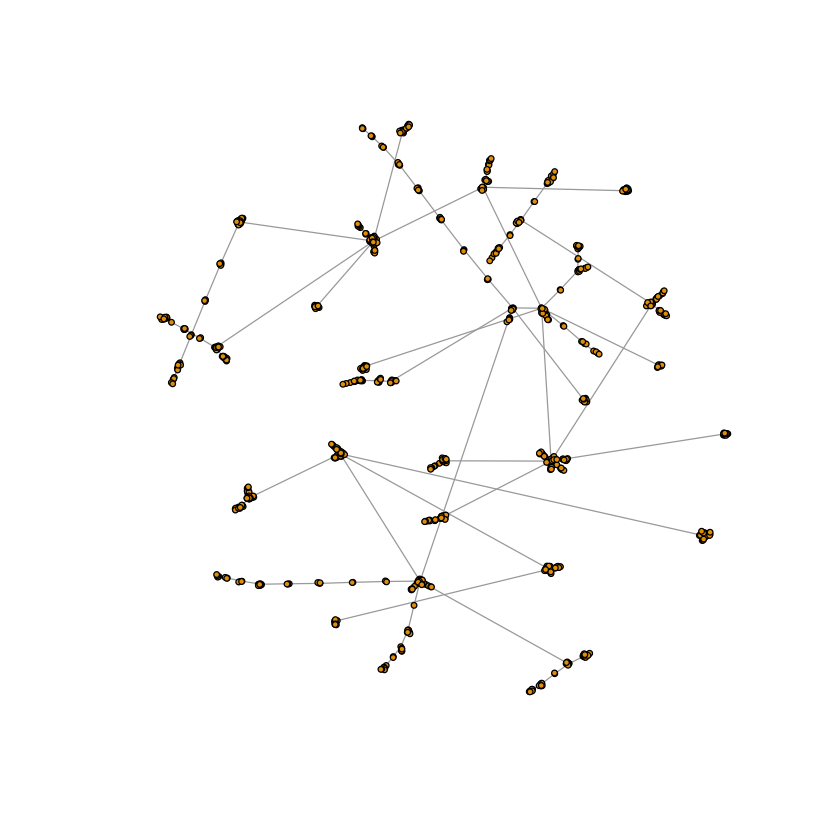

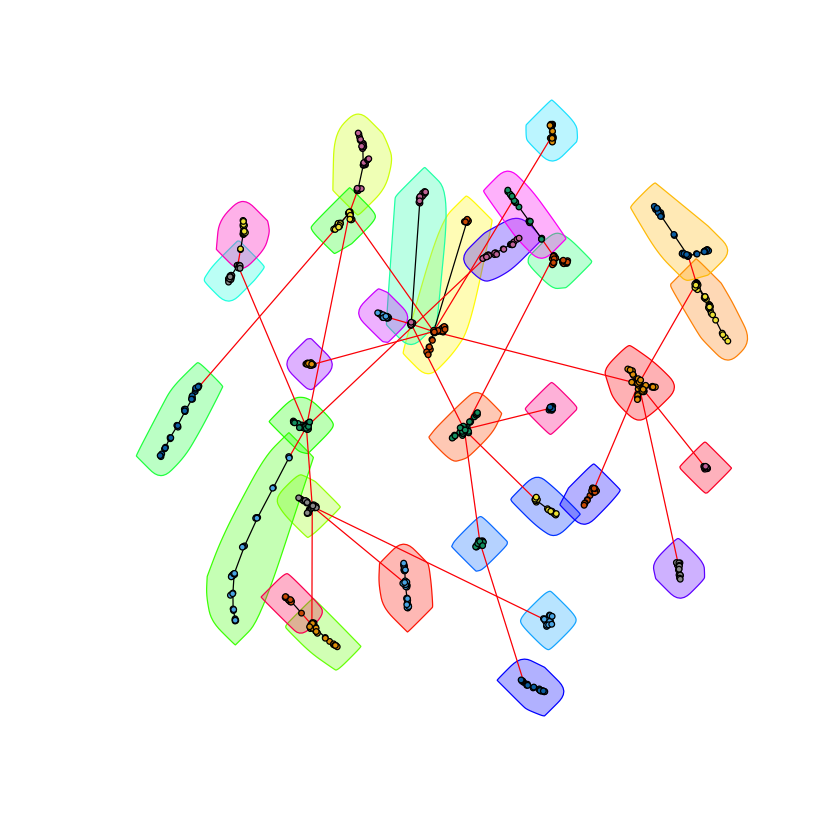

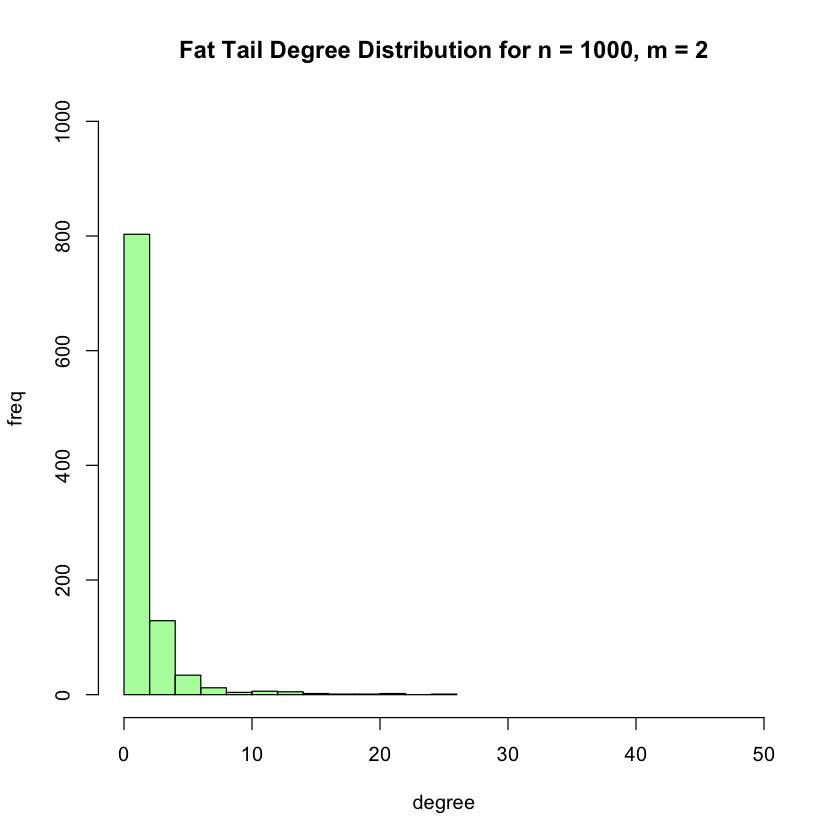

In [58]:
#2h
fat_tail_network2 <- barabasi.game(1000, directed = FALSE)

cluster2 <- clusters(fat_tail_network2)
giant_component2 <- induced_subgraph(fat_tail_network2, which(cluster2$membership == which.max(cluster2$csize)))
community_structure2 <- fastgreedy.community(giant_component2)
modularity2 <- modularity(community_structure2)
  
plot(fat_tail_network2, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot(community_structure2, fat_tail_network2, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )

hist(degree(fat_tail_network2), col=rgb(0,1,0,.4), xlim=c(0,50), ylim=c(0,1000), xlab="degree",ylab="freq", main="Fat Tail Degree Distribution for n = 1000, m = 2")





In [64]:
modularity2

[1] 0.9333618

[1] 0.7917271

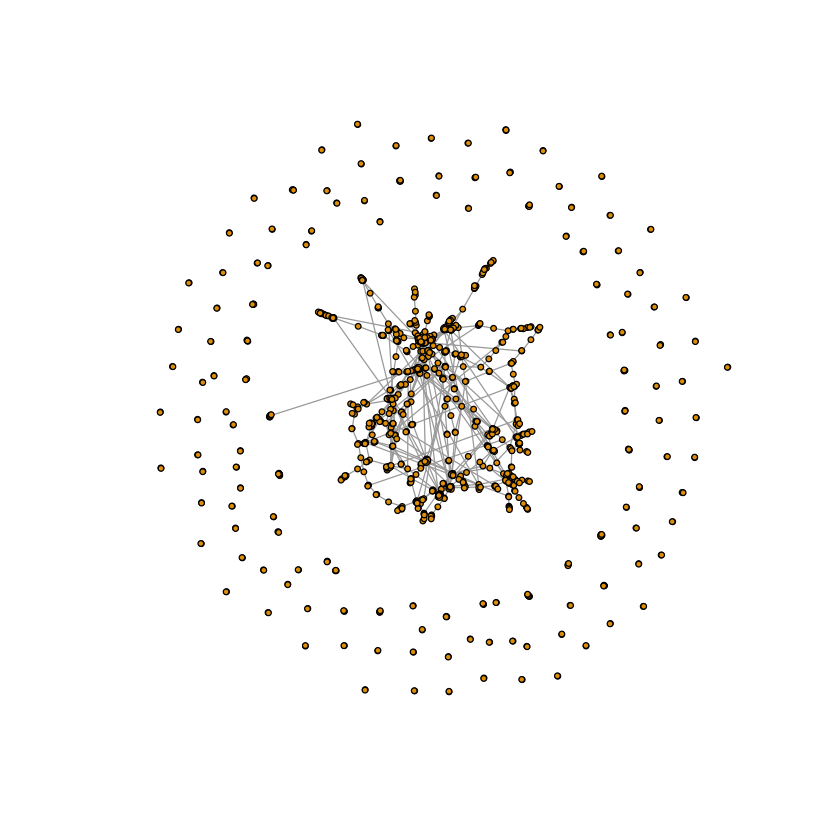

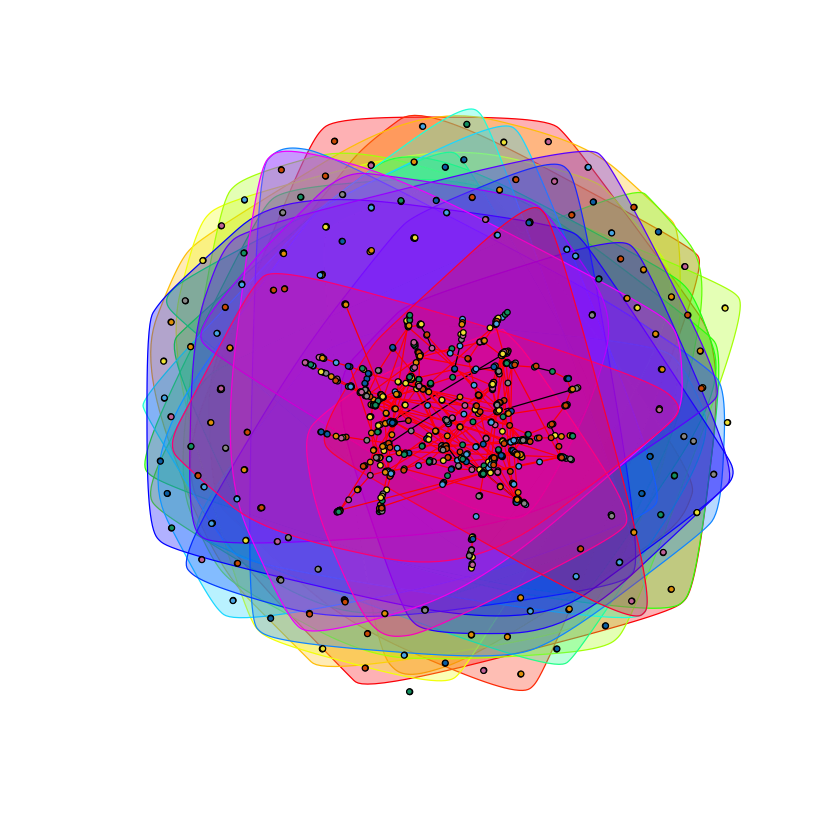

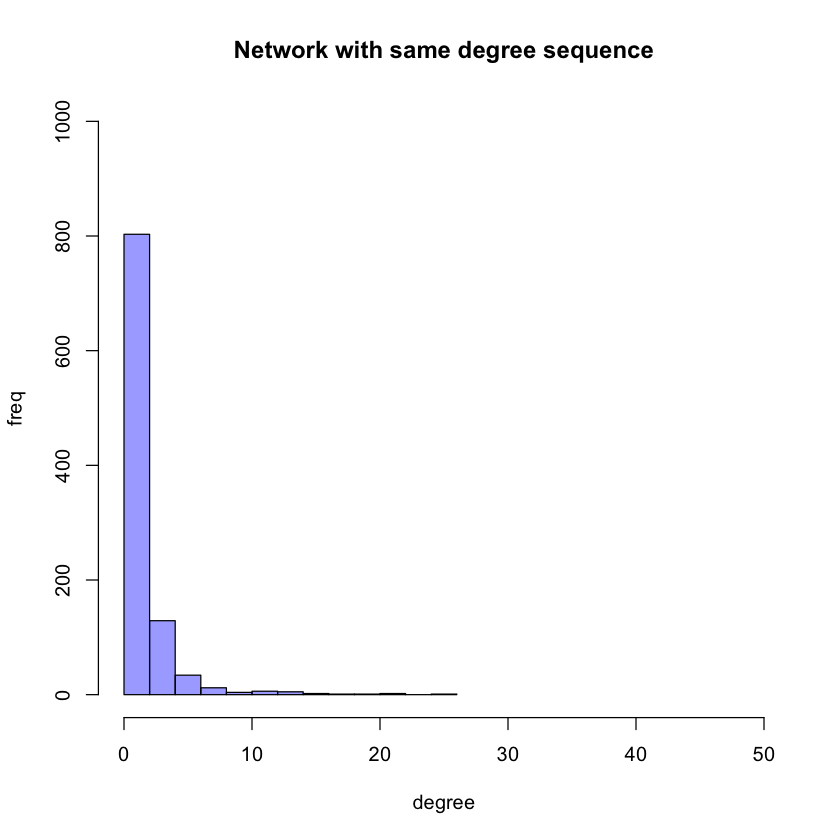

In [72]:
fat_tail_network3 <- sample_degseq(degree(fat_tail_network2), method="simple.no.multiple")

cluster3 <- clusters(fat_tail_network3)
giant_component3 <- induced_subgraph(fat_tail_network3, which(cluster3$membership == which.max(cluster3$csize)))
community_structure3 <- fastgreedy.community(giant_component3)
modularity3 <- modularity(community_structure3)
modularity3

plot(fat_tail_network3, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot(community_structure3, fat_tail_network3, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )

hist(degree(fat_tail_network3), col=rgb(0,0,1,.4), xlim=c(0,50), ylim=c(0,1000), xlab="degree", ylab="freq", main="Network with same degree sequence")



### PART3 

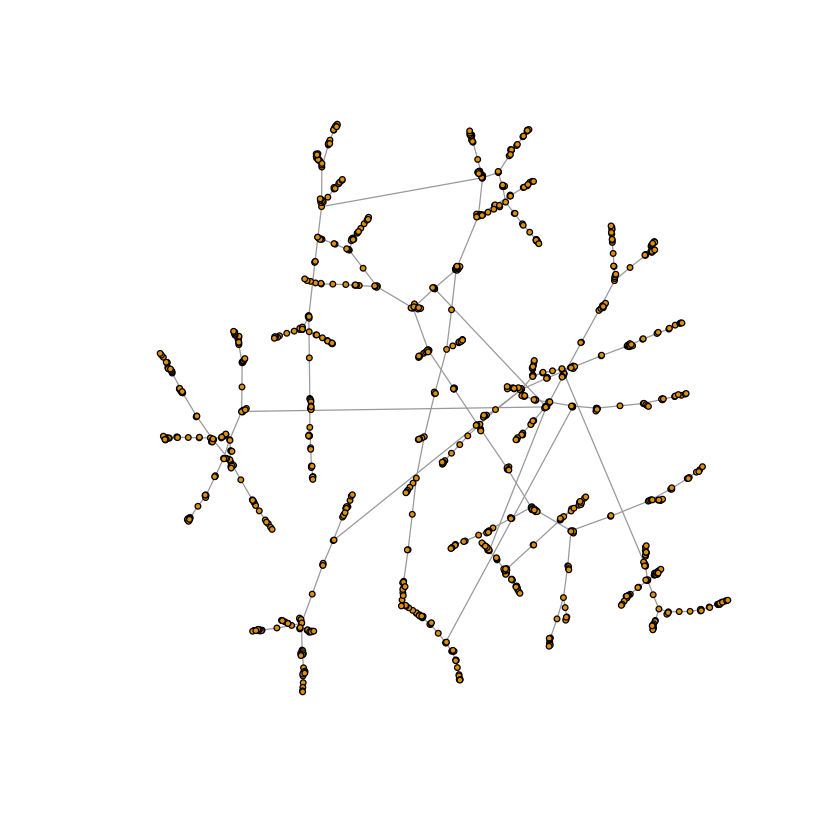

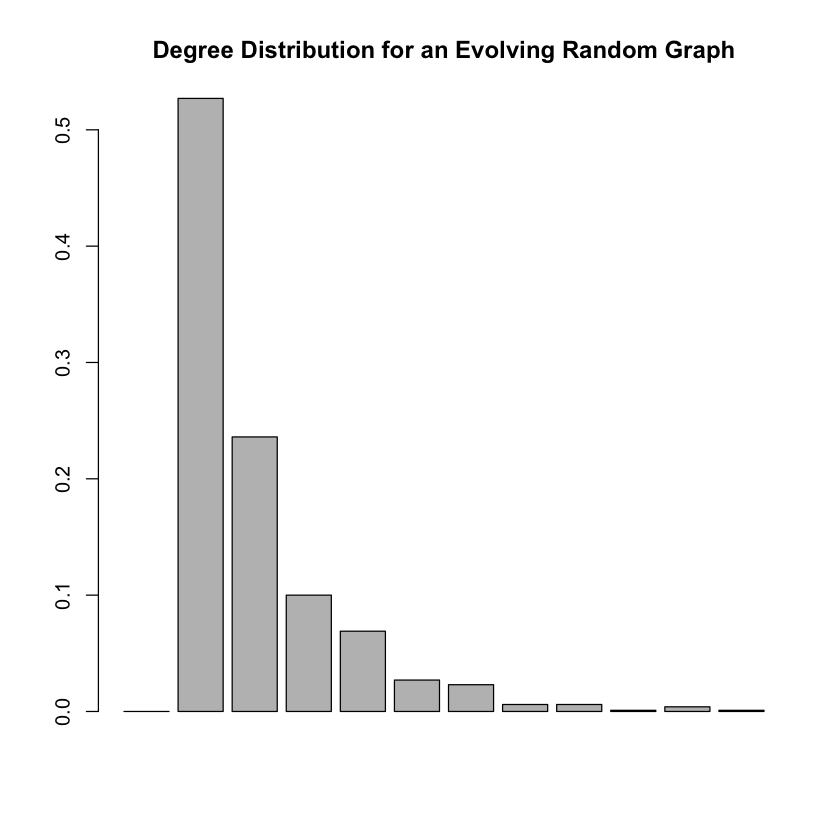

In [62]:
#3a
pa_age_graph <- aging.ba.game(1000, 1, -1, m=1, directed = FALSE)
plot(pa_age_graph, vertex.size=2, vertex.label=NA, edge.arrow.size=0)

# Plotting the degree distribution
deg_dest <- degree_distribution(pa_age_graph)
barplot(deg_dest, main="Degree Distribution for an Evolving Random Graph")

[1] 0.9352135

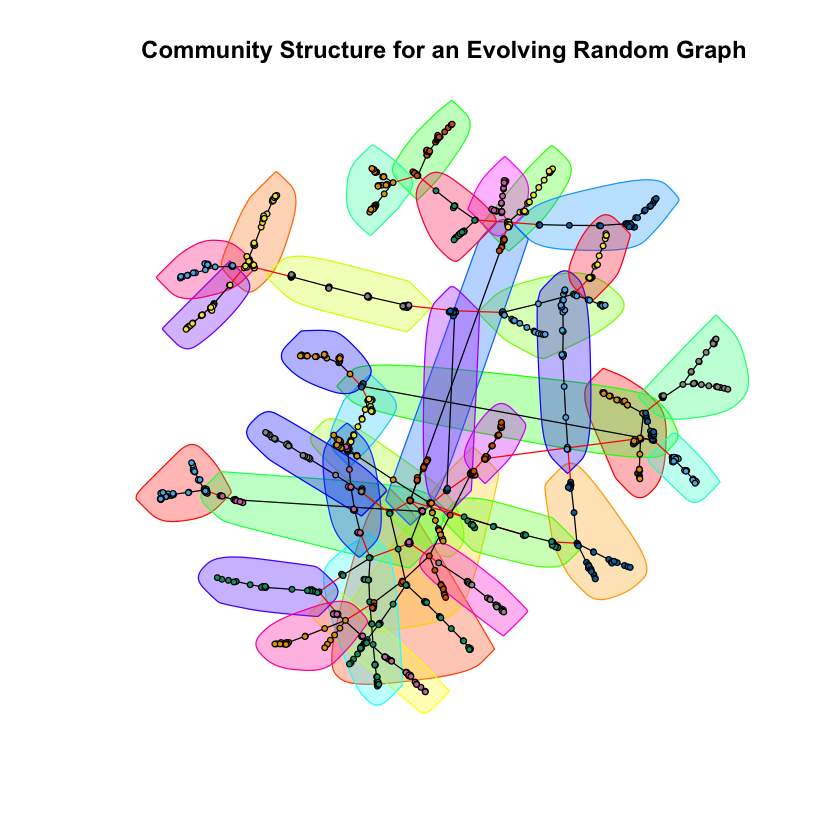

In [63]:
#3b
community_structure <- fastgreedy.community(pa_age_graph)
# Finding the modularity from the community structure computed with fast greedy method
modularity <- community_structure$modularity
max(modularity)

plot(community_structure, pa_age_graph, main="Community Structure for an Evolving Random Graph", vertex.size=2, vertex.label=NA, edge.arrow.size=0)


Call:
lm(formula = log10(probability) ~ log10(degree))

Coefficients:
  (Intercept)  log10(degree)  
       0.1077        -2.6706  


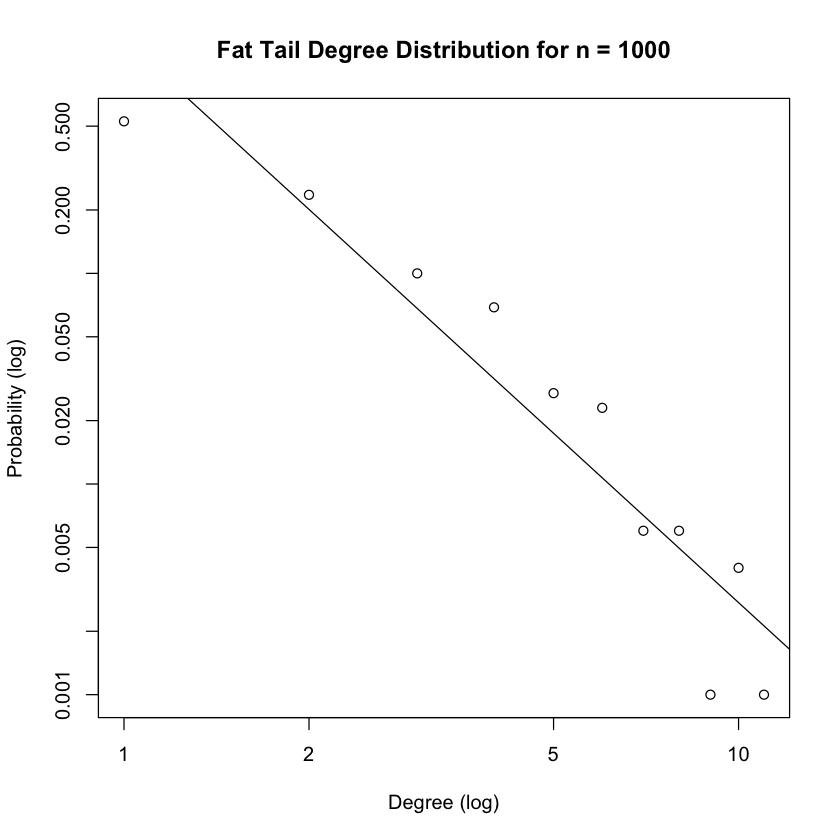

In [71]:
plot_degree_distribution = function(graph) {
  # calculate degree
  d = degree(graph, mode = "all")
  dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
  degree = 1:max(d)
  probability = dd[-1]
  # delete blank values
  nonzero.position = which(probability != 0)
  probability = probability[nonzero.position]
  degree = degree[nonzero.position]
  # plot
  plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
       col = 1,main="Fat Tail Degree Distribution for n = 1000")
  abline(lm(log10(probability) ~ log10(degree)))
    lm(log10(probability) ~ log10(degree))
}

plot_degree_distribution(pa_age_graph)